# Домашнее задаие №4.
Исследование задержки рейсов в аэропртах Нью-Йорка.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [77]:
url1 = ('https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/flights.csv')
url2 = ('https://raw.githubusercontent.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/master/weather.csv')
f = pd.read_csv(url1, sep=',')
w =  pd.read_csv(url2, sep=',')
f = f.merge(w, on=['year', 'month', 'day', 'hour', 'origin'], how='inner')

In [105]:
f.head()

,Unnamed: 0_x,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,...,Unnamed: 0_y,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,20,2013,1,1,601.0,1.0,844.0,-6.0,B6,N644JB,...,6,39.02,26.06,59.37,270.0,10.0,11.918651,0.0,1012.0,10
1,23,2013,1,1,606.0,-4.0,858.0,-12.0,AA,N633AA,...,6,39.02,26.06,59.37,270.0,10.0,11.918651,0.0,1012.0,10
2,25,2013,1,1,607.0,0.0,858.0,-17.0,UA,N53442,...,6,39.02,26.06,59.37,270.0,10.0,11.918651,0.0,1012.0,10
3,26,2013,1,1,608.0,8.0,807.0,32.0,MQ,N9EAMQ,...,6,39.02,26.06,59.37,270.0,10.0,11.918651,0.0,1012.0,10
4,30,2013,1,1,615.0,0.0,833.0,-9.0,DL,N326NB,...,6,39.02,26.06,59.37,270.0,10.0,11.918651,0.0,1012.0,10


In [16]:
w.head()

,Unnamed: 0,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib
0,1,EWR,2013,1.0,1.0,0.0,37.04,21.92,53.97,230.0,10.35702,11.918651,0.0,1013.9,10.0
1,2,EWR,2013,1.0,1.0,1.0,37.04,21.92,53.97,230.0,13.80936,15.891535,0.0,1013.0,10.0
2,3,EWR,2013,1.0,1.0,2.0,37.94,21.92,52.09,230.0,12.65858,14.567241,0.0,1012.6,10.0
3,4,EWR,2013,1.0,1.0,3.0,37.94,23.00,54.51,230.0,13.80936,15.891535,0.0,1012.7,10.0
4,5,EWR,2013,1.0,1.0,4.0,37.94,24.08,57.04,240.0,14.96014,17.215830,0.0,1012.8,10.0


Как было сказано, будем считать, что погода в каждом аэропорту одинаковая.

In [104]:
f.columns

Index(['Unnamed: 0_x', 'year', 'month', 'day', 'dep_time', 'dep_delay',
       'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin',
       'dest', 'air_time', 'distance', 'hour', 'minute', 'Unnamed: 0_y',
       'temp', 'dewp', 'humid', 'wind_dir', 'wind_speed', 'wind_gust',
       'precip', 'pressure', 'visib'],
      dtype='object')

## 1.
Нулевым шагом анализа будет общее рассмотрение работы аэропортов. Общее количество вылетов из аэропртов:

In [26]:
f.origin.value_counts()

EWR    120835
JFK    111279
LGA    104662
Name: origin, dtype: int64

 Средняя задержка прилета по каждому аэропорту будет равна:

In [27]:
f.groupby('origin').mean()['arr_delay']

origin
EWR    9.107055
JFK    5.551481
LGA    5.783488
Name: arr_delay, dtype: float64

Средняя задержка вылета по каждому аэропорту будет равна:

In [28]:
f.groupby('origin').mean()['dep_delay']

origin
EWR    15.107954
JFK    12.112159
LGA    10.346876
Name: dep_delay, dtype: float64

Видим, что больше всего задержек происходит в аэропорте EWR.

## 2.
Продолжим анализом средней задержки вылета и прилета.

In [22]:
print(f.arr_delay.mean())
print(f.dep_delay.mean()) 

6.89537675731489
12.639070257304708


Теперь посмотрим на максимальные задержки прилета и отправления.

In [23]:
print(max(f.arr_delay))
print(max(f.dep_delay)) 

1272.0
1301.0


Посмотрим в какие дни это произошло.

In [38]:
s = f.arr_delay.idxmax()
print(f.year[s], f.month[s], f.day[s])
k = f.dep_delay.idxmax()
print(f.year[k], f.month[k], f.day[k])

2013 1 9
2013 1 9


Можно сделать вывод, что не смотря на в среднем небольшие задержки, бывают ситуации, в которых рейс задерживается на несколько часов (почти сутки). Это было 9 января  2013 года.

 ## 3.
Следующим шагом посмотрим как часто вообще происходят задержки. 

Delay / All =  0.3813573413782455


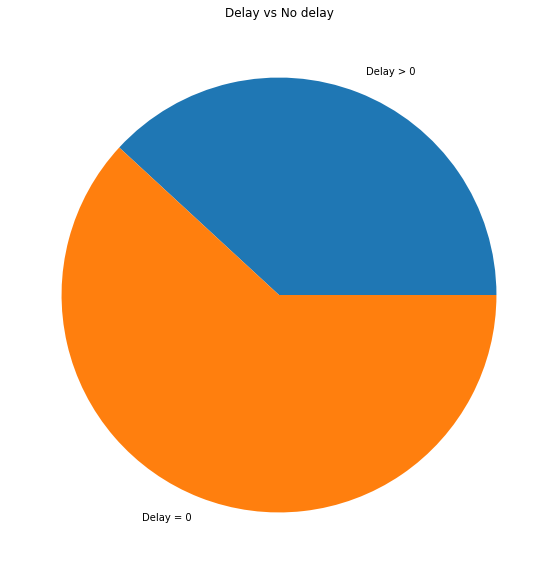

In [54]:
delay_mask = f.dep_delay > 0
plt.figure(figsize=(10,10))
plt.pie([delay_mask.sum(), f.shape[0] - delay_mask.sum()], labels=['Delay > 0', 'Delay = 0'])
plt.title('Delay vs No delay')
print('Delay / All = ',delay_mask.sum()/f.shape[0])

Видим, что задержки происходят в 38% случаев, то есть довольно часто.

## 4.
Посмотрим в какие месяцы задержки вылета и прилета происходят чаще.

In [59]:
delay_yes = f[f.dep_delay > 0]
data1=pd.DataFrame(delay_yes.groupby([delay_yes.month])['dep_delay'].size().reset_index(name='Count'))
print(data)
delay_yes1 = f[f.arr_delay > 0]
data1=pd.DataFrame(delay_yes1.groupby([delay_yes1.month])['arr_delay'].size().reset_index(name='Count'))
print(data1)

    month  Count
0       1  11150
1       2  10100
2       3  10919
3       4  12522
4       5  10189
5       6  12490
6       7  13304
7       8  11629
8       9   6845
9      10   9823
10     11   9639
11     12  14394
    month  Count
0       1  11150
1       2  10100
2       3  10919
3       4  12522
4       5  10189
5       6  12490
6       7  13304
7       8  11629
8       9   6845
9      10   9823
10     11   9639
11     12  14394


по вылетам и прилетам одинаковые данные, так что график для прилетов

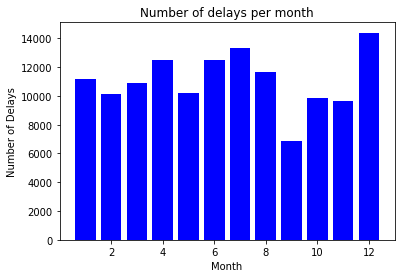

In [61]:
plt.bar(data1.month, data.Count, color="blue")
plt.ylabel('Number of Delays')
plt.xlabel('Month')
plt.title('Number of delays per month')
plt.show()

Пики опозданий приходятся на июль и декабрь, так как в июле отпуски и большой поток, а в декабре Новый Год.

## 5.
Теперь посмотрим, в какое время самолеты опаздывают чаще.

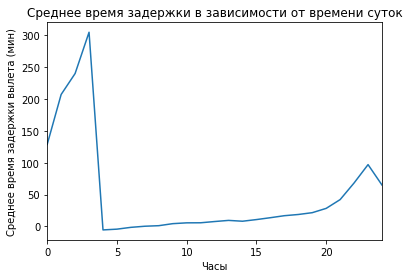

In [70]:
grouped_f = pd.DataFrame(f.groupby(f.hour)['dep_delay'].mean().reset_index(name='mean_delay'))
plt.plot(grouped_f.hour, grouped_f.mean_delay,'')
plt.xlim(0, 24)
plt.ylabel('Среднее время задержки вылета (мин)')
plt.xlabel('Часы')
plt.title('Среднее время задержки в зависимости от времени суток')
plt.show()

Из графика отчетливо видно, что основные задержки приходятся на ночь.

## 6.
Теперь посмотрим на то, как оказывают услуги различные перевозчики.

Text(0, 0.5, 'Mean delay')

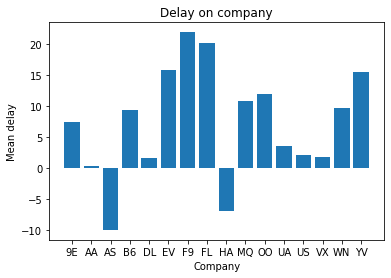

In [75]:
comp_delays = f.groupby('carrier').mean()['arr_delay']
plt.bar(range(len(comp_delays)), comp_delays)
plt.xticks(range(len(comp_delays)), comp_delays.index)
plt.title('Delay on company')
plt.xlabel('Company')
plt.ylabel('Mean delay')

Хуже всех работает компания F9 и FL. У некоторых рейсы опережают в среднем расписание. Я не часто летаю, не знаю, почему так.

## 7.
Посмотрим, как опоздание зависит от расстояния перелета.

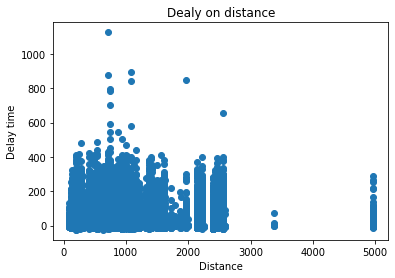

In [90]:
plt.scatter(f['distance'], f['dep_delay'])
plt.title('Dealy on distance')
plt.xlabel('Distance')
plt.ylabel('Delay time')
plt.show()

Жалкая попытка найти зависимость провалилась. Никакой зависимости нет.

## 8.
Теперь перейдем к данныс с погодой.
В первую очередь, посмотрим зависимость от скорости ветра в день вылета.

Text(0, 0.5, 'Mean delay')

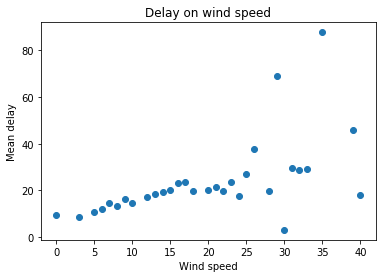

In [92]:
f['wind_speed'] = f.wind_speed.apply(lambda x: x if np.isnan(x) else round(x))

wind_delay = f.groupby('wind_speed').mean()['dep_delay']
wind_delay = wind_delay.sort_index()
wind_delay = wind_delay.drop(labels=[wind_delay.index[-1]])
plt.scatter(wind_delay.index, wind_delay)
plt.title('Delay on wind speed')
plt.xlabel('Wind speed')
plt.ylabel('Mean delay')

Видно, что можно положить линейную регрессию и выйдет хороший р квадрат зависимости. То есть скорость ветра, как и ожидалось, является значимым фактором.

## 9.
Теперь посмотрим на зависимость задержек от видимости.

Text(0, 0.5, 'Mean delay')

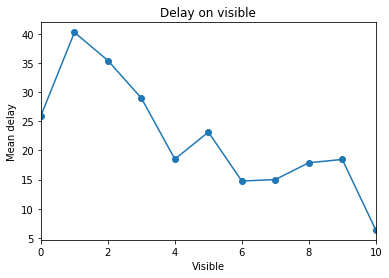

In [96]:
visib_delay = f.groupby('visib').mean()['arr_delay']
plt.scatter(visib_delay.index, visib_delay)
visib_delay.plot()

plt.title('Delay on visible')
plt.xlabel('Visible')
plt.ylabel('Mean delay')

Видно, что при низкой видимости заддержка оказывается гораздо выше.

## 10.
Посмотрим, как влияет влажность воздуха на время задержки.


Text(0, 0.5, 'Mean delay')

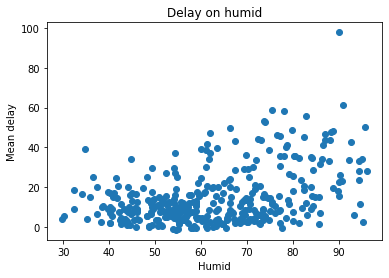

In [103]:
plt.scatter(f.groupby(['month','day'])['humid'].mean(), f.groupby(['month','day'])['dep_delay'].mean())

plt.title('Delay on humid')
plt.xlabel('Humid')
plt.ylabel('Mean delay')

Видно, что при более высокой влажности задержки увеличиваются, но зависимость не такая явная. Корреляция гораздо ниже, чем у предыдущих признаков.